In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('Data_Negara_HELP.csv')
df 

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [78]:
df.shape

(167, 10)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [80]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [81]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

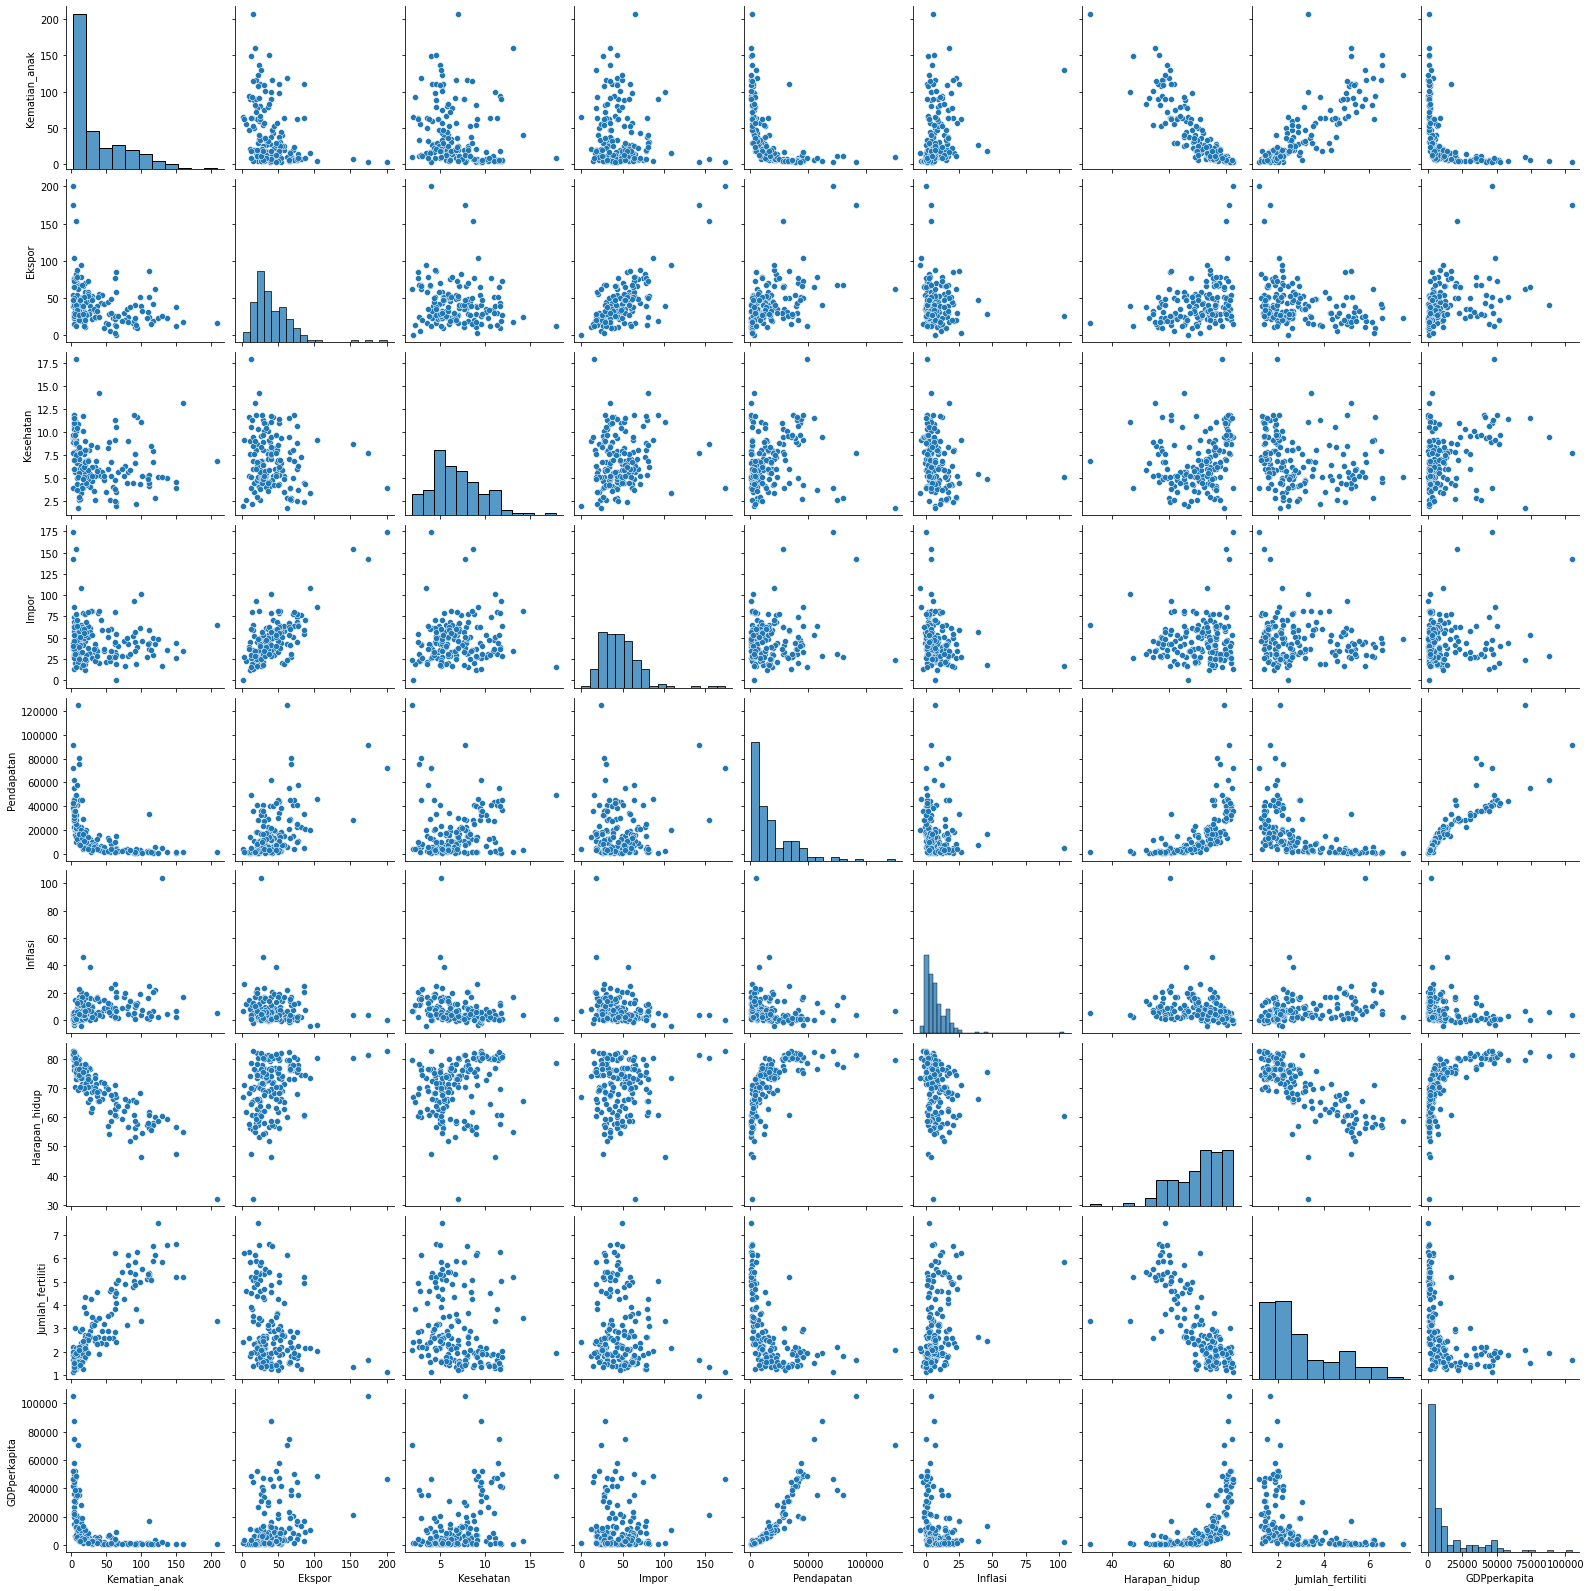

In [82]:
sns.pairplot(data=df)

C:\Users\LENOVO X260\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO X260\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO X260\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

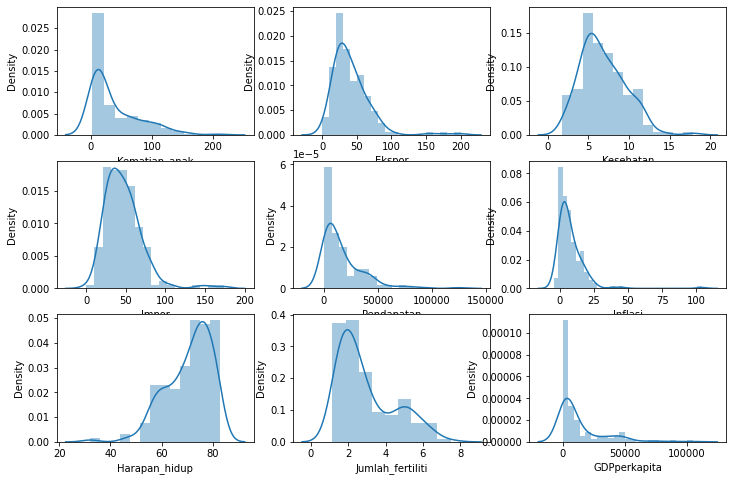

In [83]:
#Univariate analysis
plt.figure(figsize=(12,8))

for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.show()

In [84]:
#Bivariate
GDPperkapita = df.sort_values('GDPperkapita', ascending=False)
GDPperkapita

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
91,Luxembourg,2.8,175.00,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.70,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.00,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.30,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.50,11.40,43.6,44000,3.220,79.5,1.87,58000
...,...,...,...,...,...,...,...,...,...,...
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327


C:\Users\LENOVO X260\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO X260\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


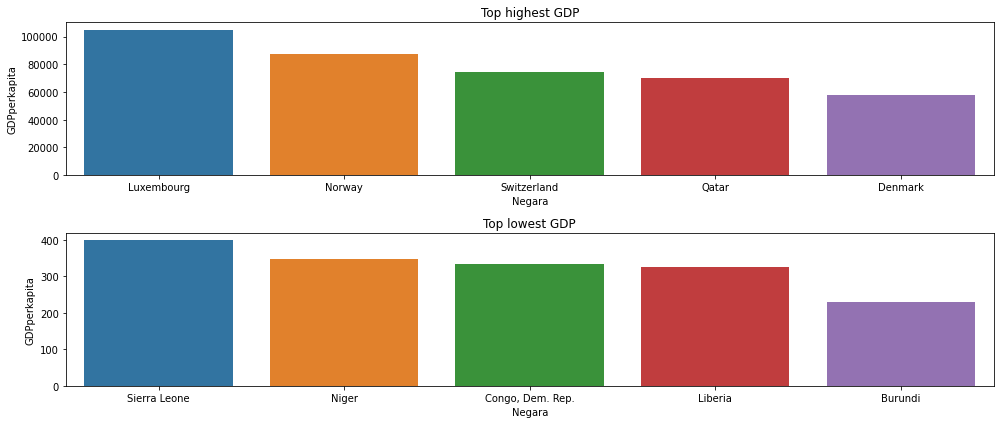

In [137]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(GDPperkapita.Negara.head(), GDPperkapita.GDPperkapita.head())
plt.title('Top highest GDP')
plt.subplot(2,1,2)
sns.barplot(GDPperkapita.Negara.tail(), GDPperkapita.GDPperkapita.tail())
plt.title('Top lowest GDP')
plt.tight_layout()
plt.show()

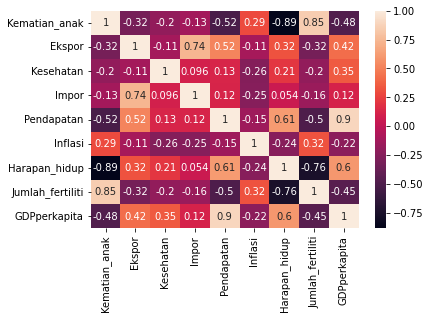

In [86]:
sns.heatmap(df.corr(), annot=True, fmt='.2g');

Kematian_anak


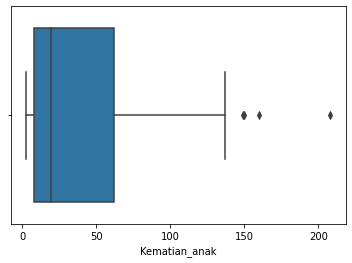

Ekspor


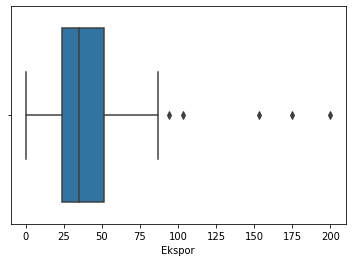

Kesehatan


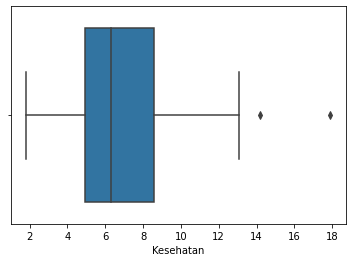

Impor


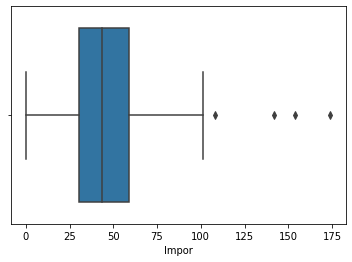

Pendapatan


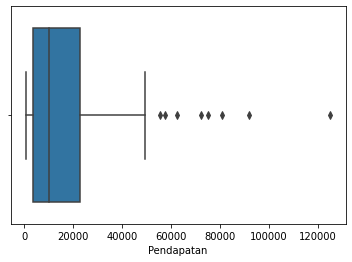

Inflasi


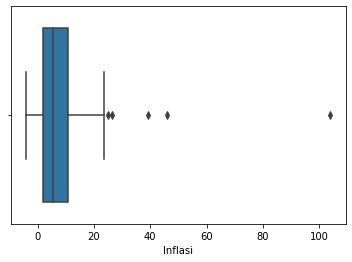

Harapan_hidup


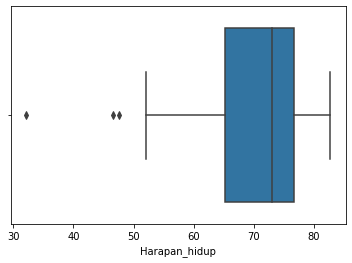

Jumlah_fertiliti


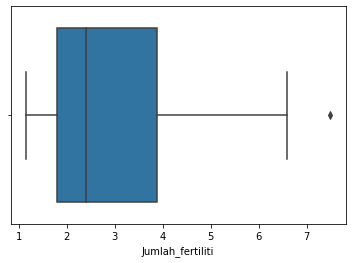

GDPperkapita


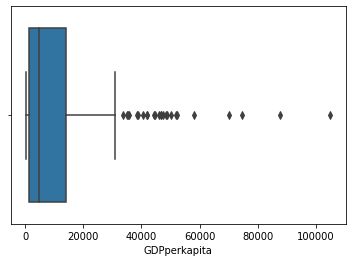

In [141]:

print('Kematian_anak')
sns.boxplot(x='Kematian_anak',data=df)
plt.show()
print('Ekspor')
sns.boxplot(x='Ekspor',data=df)
plt.show()
print('Kesehatan')
sns.boxplot(x='Kesehatan',data=df)
plt.show()
print('Impor')
sns.boxplot(x='Impor',data=df)
plt.show()
print('Pendapatan')
sns.boxplot(x='Pendapatan',data=df)
plt.show()
print('Inflasi')
sns.boxplot(x='Inflasi',data=df)
plt.show()
print('Harapan_hidup')
sns.boxplot(x='Harapan_hidup',data=df)
plt.show()
print('Jumlah_fertiliti')
sns.boxplot(x='Jumlah_fertiliti',data=df)
plt.show()
print('GDPperkapita')
sns.boxplot(x='GDPperkapita',data=df)
plt.show()

In [142]:
def get_lu_bound(x):
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    iqr = q3-q1
    lower_bound= q1 -(iqr*1.5)
    upper_bound= q3 +(iqr*1.5)
    return lower_bound, upper_bound
def get_outliers(x):
    lower_bound,upper_bound = get_lu_bound(x)
    return x[np.where((x>upper_bound)|(x<lower_bound))]

print(get_outliers(df['Kematian_anak'].values))
print(get_outliers(df['Ekspor'].values))
print(get_outliers(df['Kesehatan'].values))
print(get_outliers(df['Impor'].values))
print(get_outliers(df['Pendapatan'].values))
print(get_outliers(df['Inflasi'].values))
print(get_outliers(df['Harapan_hidup'].values))
print(get_outliers(df['Jumlah_fertiliti'].values))
print(get_outliers(df['GDPperkapita'].values))

[149. 150. 208. 160.]
[103.  175.  153.   93.8 200. ]
[14.2 17.9]
[142. 154. 108. 174.]
[ 80600  75200  91700  62300 125000  72100  55500  57600]
[ 24.9  39.2 104.   26.5  45.9]
[47.5 32.1 46.5]
[7.49]
[ 51900  46900  44400  35300  47400  58000  46200  40600  41800  41900
  48700  35800  44500  38500 105000  50300  33700  87800  70300  46600
  52100  74600  35000  38900  48400]


In [143]:
def remove_outlier(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR)))]
    return df_final
#'Kematian_anak','Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita'
df2=remove_outlier(df[['Kematian_anak','Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita']])
df2.dropna(axis=0,inplace=True)
#dataset yg sudah clear tanpa outliers
df2 

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
161,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0
162,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
164,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
165,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


In [144]:
#df2['Negara']= df['Negara']

In [145]:
#Scaling Data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df2)

In [146]:
#clustering with KMeans

from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [147]:
new_df = pd.DataFrame(data=df_std, columns=['Kematian_anak','Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita'])
new_df['label1_kmeans'] = labels1
new_df

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans
0,1.519326,-1.465026,0.560239,-0.012828,-0.979797,0.343115,-1.828627,1.917030,-0.825561,1
1,-0.656174,-0.503559,0.092995,0.196191,-0.125286,-0.465551,0.895099,-0.938772,-0.328385,0
2,-0.339899,0.051955,-0.986655,-0.775465,0.179750,1.431138,0.922200,-0.089565,-0.276376,0
3,2.370608,1.328569,-1.585453,-0.125811,-0.539189,2.460348,-1.300143,2.149878,-0.407101,1
4,-0.842392,0.431200,-0.142895,0.778055,0.816525,-0.963819,0.962853,-0.610047,0.811593,0
...,...,...,...,...,...,...,...,...,...,...
123,-0.073873,-0.305925,-0.242695,-0.939291,-0.709681,1.496484,-0.121217,-0.466229,-0.709315,1
124,-0.283738,0.489956,-0.496730,0.427807,-0.842171,-0.771047,-0.907167,0.328190,-0.485817,1
125,-0.458132,1.846693,0.224549,1.981328,-0.684004,0.777671,0.461471,-0.733319,-0.719154,0
126,0.517295,-0.396730,-0.528484,-0.605990,-0.685031,2.656388,-0.297378,1.129459,-0.719154,1


In [148]:
#new_df['Negara']= df['Negara']

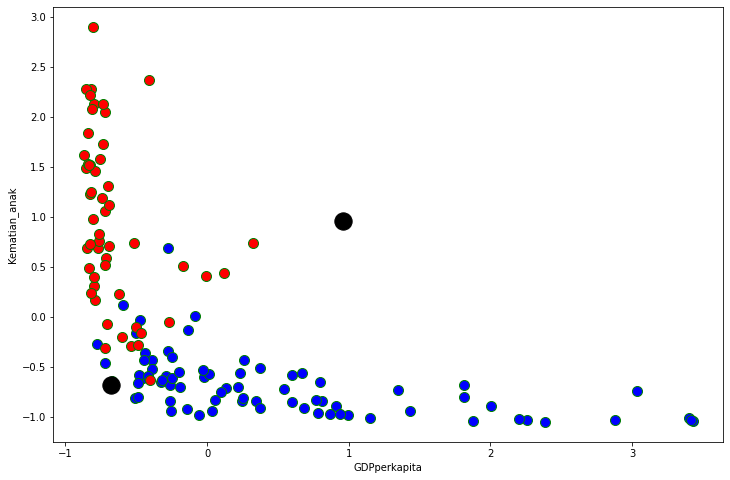

In [172]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['GDPperkapita'][new_df.label1_kmeans==0], new_df['Kematian_anak'][new_df.label1_kmeans==0], c='blue', s=100, edgecolors='green')
plt.scatter(new_df['GDPperkapita'][new_df.label1_kmeans==1], new_df['Kematian_anak'][new_df.label1_kmeans==1], c='red', s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)
plt.xlabel('GDPperkapita')
plt.ylabel('Kematian_anak')
plt.show()

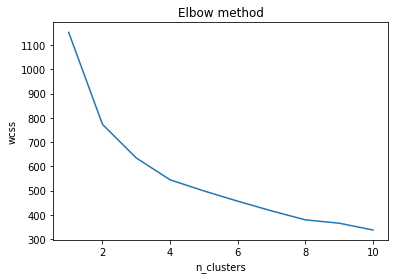

In [158]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

In [151]:
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeans2.fit(df_std)
labels2 = kmeans2.labels_
new_df['label2_kmeans'] = labels2
new_df

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,1.519326,-1.465026,0.560239,-0.012828,-0.979797,0.343115,-1.828627,1.917030,-0.825561,1,2
1,-0.656174,-0.503559,0.092995,0.196191,-0.125286,-0.465551,0.895099,-0.938772,-0.328385,0,3
2,-0.339899,0.051955,-0.986655,-0.775465,0.179750,1.431138,0.922200,-0.089565,-0.276376,0,1
3,2.370608,1.328569,-1.585453,-0.125811,-0.539189,2.460348,-1.300143,2.149878,-0.407101,1,2
4,-0.842392,0.431200,-0.142895,0.778055,0.816525,-0.963819,0.962853,-0.610047,0.811593,0,0
...,...,...,...,...,...,...,...,...,...,...,...
123,-0.073873,-0.305925,-0.242695,-0.939291,-0.709681,1.496484,-0.121217,-0.466229,-0.709315,1,1
124,-0.283738,0.489956,-0.496730,0.427807,-0.842171,-0.771047,-0.907167,0.328190,-0.485817,1,3
125,-0.458132,1.846693,0.224549,1.981328,-0.684004,0.777671,0.461471,-0.733319,-0.719154,0,3
126,0.517295,-0.396730,-0.528484,-0.605990,-0.685031,2.656388,-0.297378,1.129459,-0.719154,1,2


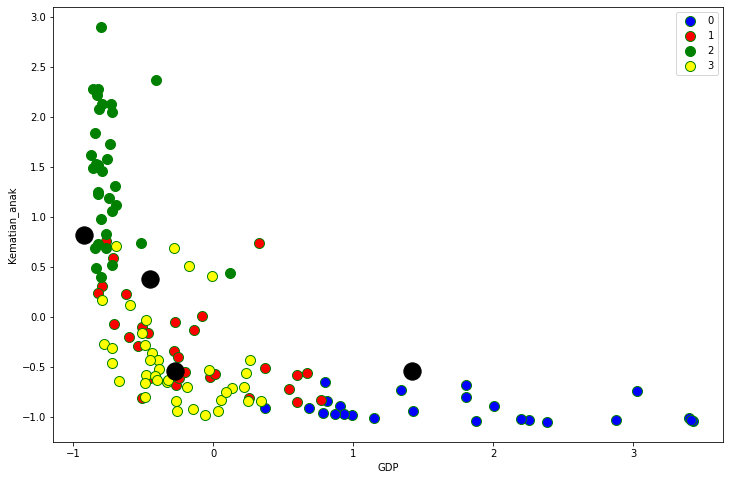

In [163]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['GDPperkapita'][new_df.label2_kmeans==0], new_df['Kematian_anak'][new_df.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['GDPperkapita'][new_df.label2_kmeans==1], new_df['Kematian_anak'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['GDPperkapita'][new_df.label2_kmeans==2], new_df['Kematian_anak'][new_df.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(new_df['GDPperkapita'][new_df.label2_kmeans==3], new_df['Kematian_anak'][new_df.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')
plt.xlabel('GDP')
plt.ylabel('Kematian_anak')
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.legend()
plt.show()

In [173]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

0.28074249512402516
0.2208489669981804


In [ ]:
#Inverse Transform

In [100]:
from sklearn.cluster import KMeans
kmeansa = KMeans(n_clusters = 2, random_state=42)
kmeansa.fit(sc.inverse_transform(df_std))
labelsa = kmeansa.labels_
labelsa

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [101]:
kmeansb = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeansb = kmeansb.fit(df_std)
labelsb = kmeansb.labels_
labelsb

array([2, 3, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 3, 3, 2, 3, 1, 3, 3, 1, 3, 2,
       2, 3, 2, 3, 0, 1, 1, 2, 2, 2, 3, 2, 0, 0, 0, 1, 1, 1, 3, 2, 0, 3,
       1, 2, 3, 2, 0, 3, 1, 2, 2, 3, 0, 1, 1, 1, 1, 0, 1, 3, 1, 2, 3, 3,
       2, 0, 3, 2, 0, 0, 3, 2, 2, 0, 3, 2, 2, 3, 3, 3, 3, 2, 1, 3, 1, 0,
       2, 3, 3, 1, 1, 0, 0, 1, 1, 2, 3, 0, 2, 3, 0, 0, 3, 2, 0, 0, 1, 3,
       2, 3, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 1, 1, 3, 3, 2, 2])

In [102]:
new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['Kematian_anak','Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita'])
new_df1['label1_kmeans'] = labelsa
new_df1['label2_kmeans'] = labelsb
new_df1

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1,2
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1,3
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1,1
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1,2
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
123,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0,1,1
124,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,1,3
125,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,1,3
126,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,1,2


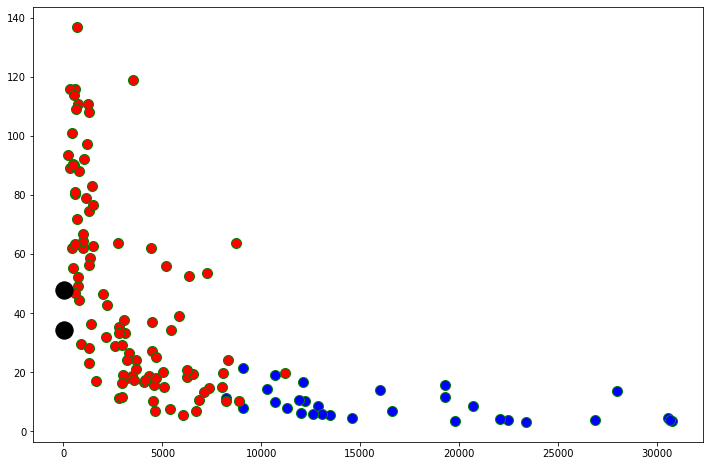

In [167]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['GDPperkapita'][new_df1.label1_kmeans == 0], new_df1['Kematian_anak'][new_df1.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df1['GDPperkapita'][new_df1.label1_kmeans == 1], new_df1['Kematian_anak'][new_df1.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )

plt.show()

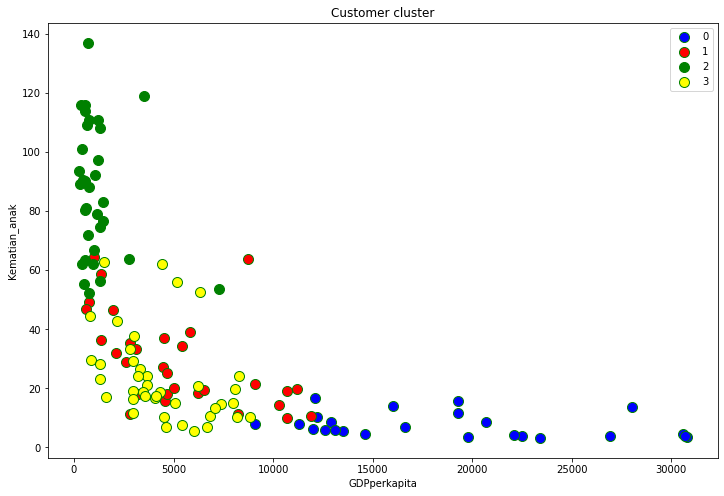

In [166]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['GDPperkapita'][new_df1.label2_kmeans == 0], new_df1['Kematian_anak'][new_df1.label2_kmeans == 0], c='blue', label='0', s=100, edgecolor='green')
plt.scatter(new_df1['GDPperkapita'][new_df1.label2_kmeans == 1], new_df1['Kematian_anak'][new_df1.label2_kmeans == 1], c='red', label='1', s=100, edgecolor='green')
plt.scatter(new_df1['GDPperkapita'][new_df1.label2_kmeans == 2], new_df1['Kematian_anak'][new_df1.label2_kmeans == 2], c='green',label = '2', s=100, edgecolor='green')
plt.scatter(new_df1['GDPperkapita'][new_df1.label2_kmeans == 3], new_df1['Kematian_anak'][new_df1.label2_kmeans == 3], c='yellow', label = '3', s=100, edgecolor='green')

# plt.scatter(kmeansb.cluster_centers_[:, 0],kmeansb.cluster_centers_[:, 1], c='k', s=300 )
plt.legend()
plt.title('Customer cluster')
plt.xlabel('GDPperkapita')
plt.ylabel('Kematian_anak')
plt.show()

In [126]:
#summary to main data
df3 = pd.merge(df,new_df1, how='right')
"""new_df1['Negara'] = df['Negara']
df3 = new_df1
"""
df3['label2_kmeans'] = df3['label2_kmeans'].astype('object')
df3

C:\Users\LENOVO X260\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\reshape\merge.py:1214: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1,3
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
123,Qatar,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0,1,1
124,Romania,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,1,3
125,Russia,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,1,3
126,Rwanda,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,1,2


In [127]:
df3.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
label1_kmeans       0
label2_kmeans       0
dtype: int64

In [128]:
top_gdp = df3[df3['label2_kmeans']==0]
top_gdp

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,0,0
8,Austria,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,0,0
9,Azerbaijan,8.6,69.5,4.97,50.9,41100.0,7.440,76.0,2.16,20700.0,0,0
11,Bahrain,14.2,39.5,7.97,48.7,15300.0,0.321,76.7,1.78,16000.0,0,0
26,Burundi,8.7,37.7,7.96,31.3,19400.0,8.960,79.1,1.88,12900.0,0,0
34,China,5.5,37.6,7.76,38.1,20100.0,0.821,76.3,1.55,13500.0,0,0
35,Colombia,3.6,50.2,5.97,57.5,33900.0,2.010,79.9,1.42,30800.0,0,0
36,Comoros,3.4,66.0,7.88,62.9,28300.0,-1.430,77.5,1.51,19800.0,0,0
42,Cyprus,4.5,75.1,6.03,68.7,22700.0,1.740,76.0,1.72,14600.0,0,0
48,El Salvador,3.9,22.1,10.30,30.7,28700.0,0.673,80.4,1.48,26900.0,0,0


In [129]:
top_gdp.sort_values(by=['GDPperkapita'],ascending=False)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
35,Colombia,3.6,50.2,5.97,57.5,33900.0,2.010,79.9,1.42,30800.0,0,0
107,Myanmar,3.8,25.5,9.54,26.8,32500.0,0.160,81.9,1.37,30700.0,0,0
59,Ghana,4.6,35.0,7.63,32.9,29600.0,1.770,81.4,3.03,30600.0,0,0
8,Austria,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,0,0
48,El Salvador,3.9,22.1,10.30,30.7,28700.0,0.673,80.4,1.48,26900.0,0,0
103,Mongolia,3.2,64.3,9.41,62.9,28700.0,-0.987,79.5,1.57,23400.0,0,0
94,Malawi,3.9,29.9,11.00,37.4,27200.0,0.643,79.8,1.39,22500.0,0,0
106,Mozambique,4.1,49.4,6.93,46.2,30400.0,3.160,80.1,1.23,22100.0,0,0
9,Azerbaijan,8.6,69.5,4.97,50.9,41100.0,7.440,76.0,2.16,20700.0,0,0
36,Comoros,3.4,66.0,7.88,62.9,28300.0,-1.430,77.5,1.51,19800.0,0,0


In [130]:
#summary

df['K_means_labels'] = pd.Series(labelsb).astype('object')

In [131]:
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,NaN
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,NaN
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,NaN
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,NaN


In [132]:
#filtering
top_gdp = df[df['K_means_labels']==0]
top_gdp

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
4,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200,0
8,Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840,0
11,Bahrain,8.6,69.500,4.97,50.9000,41100,7.440,76.0,2.16,20700,0
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,0
34,China,15.7,26.300,5.07,22.6000,9530,6.940,74.6,1.59,4560,0
35,Colombia,18.6,15.900,7.59,17.8000,10900,3.860,76.4,2.01,6250,0
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,0
42,Cyprus,3.6,50.200,5.97,57.5000,33900,2.010,79.9,1.42,30800,0
48,El Salvador,19.2,26.900,6.91,46.6000,7300,2.650,74.1,2.27,2990,0


In [136]:
top_gdp.sort_values(by=['GDPperkapita'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
26,Burundi,93.6,8.920,11.60,39.2000,764,12.30,57.7,6.26,231,0
93,Madagascar,62.2,25.000,3.77,43.0000,1390,8.79,60.8,4.60,413,0
106,Mozambique,101.0,31.500,5.21,46.2000,918,7.64,54.5,5.56,419,0
94,Malawi,90.5,22.800,6.59,34.9000,1030,12.10,53.1,5.31,459,0
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.87,65.9,4.75,769,0
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988,0
87,Lesotho,99.7,39.400,11.10,101.0000,2380,4.15,46.5,3.30,1170,0
99,Mauritania,97.4,50.700,4.41,61.2000,3320,18.90,68.2,4.98,1200,0
59,Ghana,74.7,29.500,5.22,45.9000,3060,16.60,62.2,4.27,1310,0
102,Moldova,17.2,39.200,11.70,78.5000,3910,11.10,69.7,1.27,1630,0


In [179]:
#3D visualization
df3 = remove_outlier(df[['GDPperkapita', 'Kesehatan', 'Kematian_anak']])
df3.dropna(axis=0, inplace=True)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df3.astype(float))

kmeans3 = KMeans(n_clusters = 4, init='k-means++', random_state=42).fit(df_std)
labels3 = kmeans3.labels_

new_df = pd.DataFrame(data=df_std, columns=['GDPperkapita', 'Kesehatan', 'Kematian_anak'])
new_df['label3_kmeans'] = labels3
new_df

,GDPperkapita,Kesehatan,Kematian_anak,label3_kmeans
0,-0.837997,0.555360,1.395948,1
1,-0.342424,0.091569,-0.673875,0
2,-0.290583,-0.980105,-0.372963,0
3,-0.420886,-1.574479,2.205878,1
4,0.793879,-0.142579,-0.851047,0
...,...,...,...,...
132,-0.499348,-0.493799,-0.319530,0
133,0.976023,-0.646896,-0.659813,0
134,-0.731933,0.222151,-0.485453,0
135,-0.731933,-0.525319,0.442592,1


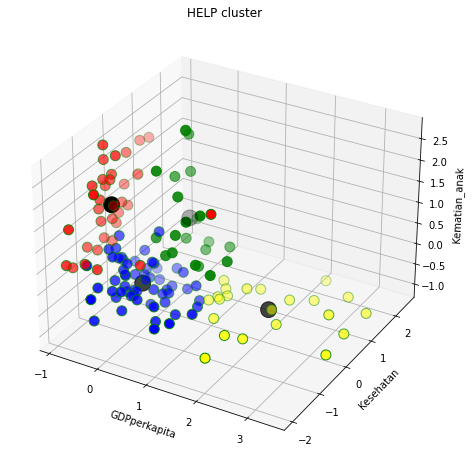

In [180]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df['GDPperkapita'][new_df.label3_kmeans==0], new_df['Kesehatan'][new_df.label3_kmeans==0], new_df['Kematian_anak'][new_df.label3_kmeans==0], c='blue', s=100, edgecolors='green')
ax.scatter(new_df['GDPperkapita'][new_df.label3_kmeans==1], new_df['Kesehatan'][new_df.label3_kmeans==1], new_df['Kematian_anak'][new_df.label3_kmeans==1], c='red', s=100, edgecolors='green')
ax.scatter(new_df['GDPperkapita'][new_df.label3_kmeans==2], new_df['Kesehatan'][new_df.label3_kmeans==2], new_df['Kematian_anak'][new_df.label3_kmeans==2], c='green', s=100, edgecolors='green')
ax.scatter(new_df['GDPperkapita'][new_df.label3_kmeans==3], new_df['Kesehatan'][new_df.label3_kmeans==3], new_df['Kematian_anak'][new_df.label3_kmeans==3], c='yellow', s=100, edgecolors='green')

# plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
scatter = ax.scatter(kmeans3.cluster_centers_[:, 0],
            kmeans3.cluster_centers_[:, 1],
            kmeans3.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='k',
            label='centroids')
plt.title('HELP cluster')
plt.xlabel('GDPperkapita')
plt.ylabel('Kesehatan')
ax.set_zlabel('Kematian_anak')
plt.show()